# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

|                    |     |
|:-------------------|:----|
| Add1(in Thousands) | 290 |
| Add2(in Thousands) | 312 |
| Add3(in Thousands) | 309 |
| Add4(in Thousands) | 298 |
| Add5(in Thousands) | 320 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\91999\Downloads\Add_sales_data_2018.csv')

In [3]:
df.shape

(205, 7)

In [4]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [114]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
df['Profit(in Thousands)'].nunique()

205

In [8]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


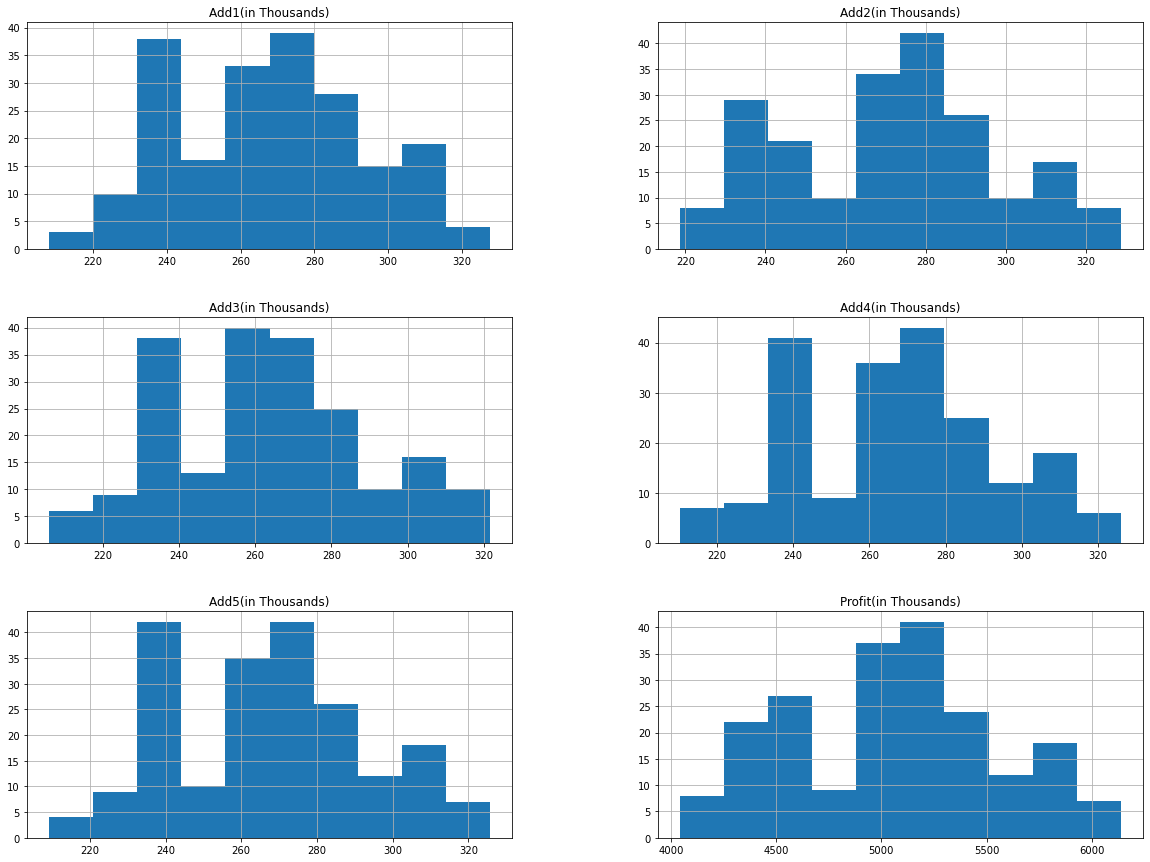

In [9]:
# Plotting the hisogram
df.hist(figsize=(20,15))
plt.show()

**1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

<AxesSubplot:>

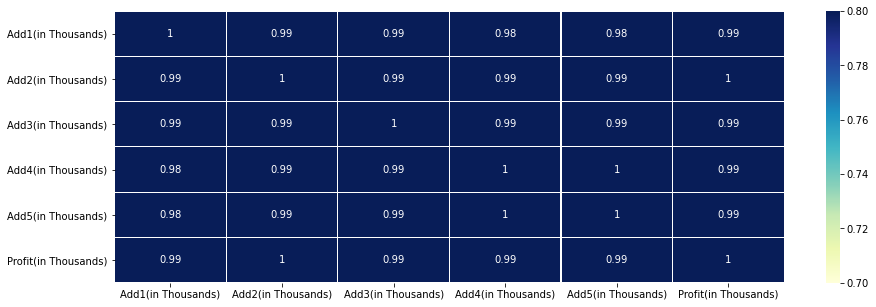

In [10]:
# plotting heatmap
Rel=df.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(Rel,vmin=0.7,vmax=0.8,annot=True,linewidths=0.2,cmap='YlGnBu')


* From the plot high correlation values noted.
* Add4,Add 5 having same correlation Value towards profit.
* Add5 is removed using feature reduction technique.

In [11]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [127]:
# Applying Feature reduction 
df1=df.drop(['Add5(in Thousands)'],axis=1) 

<AxesSubplot:>

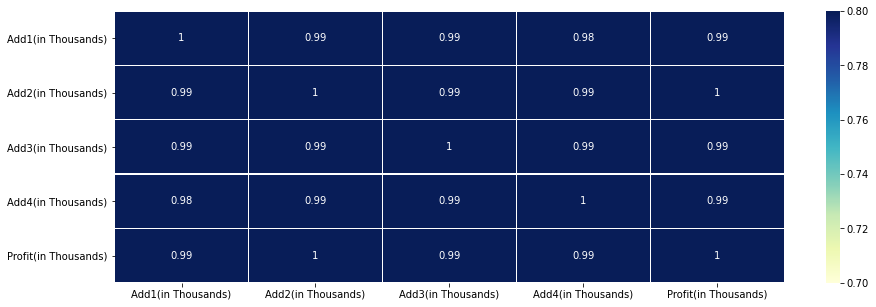

In [128]:
Rel=df1.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(Rel,vmin=0.7,vmax=0.8,annot=True,linewidths=0.2,cmap='YlGnBu')

In [129]:
y=df['Profit(in Thousands)']
x=df1.drop(['Date','Profit(in Thousands)'],axis=1)

In [130]:
x.shape

(205, 4)

**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [132]:
from sklearn import linear_model
df2=linear_model.LinearRegression()

In [133]:
model=df2.fit(x_train,y_train)

In [134]:
prediction=model.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error
print('MSE is:\n', mean_squared_error(y_test,prediction))

MSE is:
 0.5381640443754303


* Mean square error of the model is 0.5381640443754303.

In [136]:
model.intercept_

-0.1951707349599019

In [137]:
model.coef_

array([ 0.97317652, 12.43994559,  3.54702319,  1.8201929 ])

In [138]:
x.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands)
0,208.00,222.25,206.85,216.00
1,217.00,218.60,205.90,210.25
2,223.50,227.80,216.15,217.25
3,230.00,237.50,225.75,226.45
4,234.55,234.60,221.05,230.30


**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

|                    |     |
|:-------------------|:----|
| Add1(in Thousands) | 290 |
| Add2(in Thousands) | 312 |
| Add3(in Thousands) | 309 |
| Add4(in Thousands) | 298 |
| Add5(in Thousands) | 320 |

In [140]:
make_predict=[[290,312,309,298]]
model.predict(make_predict).item()

5801.736693174622

In [ ]:
# by  Sidharth S